In [397]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

df = pd.read_csv('/Users/lukaszstrzalkowski/Documents/Uczelnia /Kółko naukowe/propdesk/propdesk2/bez nazwy/Otodom_page_593.csv')
df.head()
#Wywalamy duplikaty, bo nie są nam potrzebne
df.drop_duplicates(subset=['id'], keep='first', inplace=True)

In [398]:
def clean_level(x):
    # zachowujemy NaN
    if pd.isnull(x):
        return np.nan

    # z formatu "['floor_3']" wydobywamy string 'floor_3'
    try:
        lvl = ast.literal_eval(x)[0]
    except (ValueError, SyntaxError, IndexError):
        return np.nan

    # reguła dla floor_higher_N -> N+1
    if lvl.startswith('floor_higher_'):
        n = int(lvl.split('_')[-1])
        return n + 1

    # mapping dla niestandardowych poziomów
    special = {
        'ground_floor': 0,
        'garret': 0,
        'cellar': -1,  # opcjonalnie: piwnica jako -1
    }
    if lvl in special:
        return special[lvl]

    # standardowy floor_N -> N
    if lvl.startswith('floor_'):
        return int(lvl.split('_')[-1])

    # w pozostałych wypadkach NaN
    return np.nan


In [399]:
df['property_level_clean'] = df['property_level'].apply(clean_level)

In [400]:
df['property_level_clean'].value_counts(dropna=False)


property_level_clean
 1.0     2934
 2.0     2440
 3.0     2150
 0.0     2043
 4.0     1347
 5.0      920
 6.0      628
 NaN      469
 7.0      427
 11.0     357
 8.0      316
 10.0     231
 9.0      223
-1.0       12
Name: count, dtype: int64

In [401]:
df.describe().T

count          mean           std         min  \
id                    14497.0  6.647316e+07  6.746466e+05  33133193.0   
id_realestateagency   12050.0  6.470973e+06  3.632605e+06     14738.0   
price                 13430.0  1.138248e+06  1.039635e+06      3600.0   
row_price_m2          13397.0  1.850797e+04  6.323760e+03        12.0   
total_area            14352.0  6.853562e+01  1.051943e+03        11.3   
total_property_level  13579.0  6.274836e+00  5.098993e+00         1.0   
building_year         12963.0  1.998226e+03  1.670272e+02         1.0   
elevator               9942.0  1.000000e+00  0.000000e+00         1.0   
balcony/loggia        13792.0  1.000000e+00  0.000000e+00         1.0   
property_rent         10145.0  9.850882e+02  1.417134e+04         0.0   
property_level_clean  14028.0  2.977545e+00  2.674760e+00        -1.0   

                             25%          50%          75%         max  
id                    66354563.0  66647614.00  66761936.00  66828406.0  
id_realestateagency    2881958.0   7876997.00   9840498.00  10852610.0  
price                   675000.0    855835.50   1226000.00  25000000.0  
row_price_m2             14609.0     17143.00     20739.00    127747.0  
total_area                  40.0        52.47        67.48    126000.0  
total_property_level         4.0         5.00         8.00       255.0  
building_year             1974.0      2009.00      2024.00     20024.0  
elevator                     1.0         1.00         1.00         1.0  
balcony/loggia               1.0         1.00         1.00         1.0  
property_rent              490.0       700.00       950.00   1099000.0  
property_level_clean         1.0         2.00         4.00        11.0

In [402]:
df.head(5).T

0  \
id                                                         66706477   
id_realestateagency                                       7416781.0   
date_added                                2025-04-10T09:21:22+02:00   
date_update                               2025-05-15T17:07:08+02:00   
url                   nowe-i-stare-miasto-kamienica-obok-sn-ID4wToW   
portal_name                                                  Otodom   
market_type                                               SECONDARY   
property_type                                            mieszkanie   
price                                                      999000.0   
row_price_m2                                                24038.0   
city                                                       warszawa   
district                                                Śródmieście   
district.1                                              Śródmieście   
street                                              ul. Nowiniarska   
street.1                                            ul. Nowiniarska   
total_area                                                    41.56   
property_level                                          ['floor_3']   
total_property_level                                            4.0   
no_rooms                                                      ['2']   
kitchen_type                                                    NaN   
ownership_form                                       full_ownership   
building_type                                              tenement   
building_year                                                1956.0   
material                                                      brick   
heating_type                                                    NaN   
elevator                                                        NaN   
heating_type.1                                                  NaN   
windows                                                         NaN   
balcony/loggia                                                  1.0   
parking_type                                                    NaN   
basement                                                   basement   
security                                                        NaN   
property_rent                                                 582.0   
property_level_clean                                            3.0   

                                                                      1  \
id                                                             66803615   
id_realestateagency                                           7416781.0   
date_added                                    2025-05-08T23:21:22+02:00   
date_update                                   2025-05-15T17:06:38+02:00   
url                   dwustronne-dwie-lazienki-3-sypialnie-garaz-ID4...   
portal_name                                                      Otodom   
market_type                                                   SECONDARY   
property_type                                                mieszkanie   
price                                                         1799000.0   
row_price_m2                                                    19463.0   
city                                                           warszawa   
district                                                        Wilanów   
district.1                                                      Wilanów   
street                                             al. Aleja Wilanowska   
street.1                                           al. Aleja Wilanowska   
total_area                                                        92.43   
property_level                                              ['floor_3']   
total_property_level                                                4.0   
no_rooms                                                          ['4']   
kitchen_type                                                        NaN   
owner

In [403]:
df.dtypes

id                        int64
id_realestateagency     float64
date_added               object
date_update              object
url                      object
portal_name              object
market_type              object
property_type            object
price                   float64
row_price_m2            float64
city                     object
district                 object
district.1               object
street                   object
street.1                 object
total_area              float64
property_level           object
total_property_level    float64
no_rooms                 object
kitchen_type             object
ownership_form           object
building_type            object
building_year           float64
material                 object
heating_type             object
elevator                float64
heating_type.1           object
windows                  object
balcony/loggia          float64
parking_type             object
basement                 object
security

In [404]:
df = df.drop(columns=['heating_type.1', 'property_level','total_property_level','district.1', 'street.1','ownership_form'])

In [405]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nKolumna: {col}")
    print(df[col].unique())


Kolumna: date_added
['2025-04-10T09:21:22+02:00' '2025-05-08T23:21:22+02:00'
 '2025-01-13T12:36:28+01:00' ... '2025-03-19T20:36:37+01:00'
 '2025-04-16T18:31:48+02:00' '2025-01-10T00:56:50+01:00']

Kolumna: date_update
['2025-05-15T17:07:08+02:00' '2025-05-15T17:06:38+02:00'
 '2025-05-15T17:05:50+02:00' ... '2025-05-13T13:58:32+02:00'
 '2025-04-16T18:34:08+02:00' '2025-05-15T01:14:15+02:00']

Kolumna: url
['nowe-i-stare-miasto-kamienica-obok-sn-ID4wToW'
 'dwustronne-dwie-lazienki-3-sypialnie-garaz-ID4viFF'
 '3-pokojowe-mieszkanie-57m2-balkon-ID4ugOR' ...
 'zamienie-mieszkanie-komunalne-na-wlasnosciowe-ID4wv7u'
 'bezposrednio-3kawalerki-1suterena-db-lokalizacja-ID4v04u'
 '2-pokoje-osiedle-jerozolimskie-ursus-ID4udrX']

Kolumna: portal_name
['Otodom']

Kolumna: market_type
['SECONDARY' 'PRIMARY' nan]

Kolumna: property_type
['mieszkanie' 'inwestycje']

Kolumna: city
['warszawa' 'macierzysz' 'zabki' 'poznan' 'marki' 'blizne-laszczynskiego'
 'piastow' 'janow_18012' 'sulejowek' 'michalow-gr

In [406]:
#Usuwam wiersze gdzie price jest NaN 
df = df.dropna(subset=['price'])
df = df.dropna(subset =['row_price_m2'])
df = df.dropna(subset=['no_rooms'])
df = df.dropna(subset=['total_area'])

In [407]:
    # 1. Konwersja dat ISO na datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_update'] = pd.to_datetime(df['date_update'], errors='coerce')
    
    #2. market_type 0 = Secondary, 1= primary
df['market_type'] = df['market_type'].map({'SECONDARY': 0, 'PRIMARY': 1})
     
     #3Wyciągamy liczbę pokoi z kolumny no_rooms, more uznajemy za Nan
df['no_rooms'] = df['no_rooms'].str.extract(r"(\d+)").astype(float)
     
     #4. kitchen_type – kodowanie: 1 = separate kitchen, 0 = brak lub inne
df['kitchen_type'] = df['kitchen_type'].apply(lambda x: 1 if x == 'separate kitchen' else 0)

#5. parking_type - zmiana nazwy kolumny na garaz. 
df['garage'] = df['parking_type'].apply(lambda x: 1 if x == 'garage' else 0)
df.drop(columns='parking_type', inplace=True)

#6basement: 1 jeśli 'basement', inaczej 0
df['basement'] = df['basement'].apply(lambda x: 1 if x == 'basement' else 0)

#Liczy liczbę zabezpieczeń
df['security_count'] = df['security'].apply(
    lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else 0
)

#6basement: 1 jeśli 'basement', inaczej 0
df['elevator'] = df['elevator'].apply(lambda x: 1 if x == 1 else 0)

df['balcony/loggia'] = df['balcony/loggia'].apply(lambda x: 1 if x == 1 else 0)

#Wyrzucamy windows
df.drop(columns='windows', inplace=True)

#Wyrzucamy material, bo za duzo nanow mamy
df.drop(columns='material', inplace=True)

#Wyrzucamy street, bo za rzadko jest podana 
df.drop(columns='street', inplace=True)

#Wyrzucamy Nany, jezeli w discrit jest Nan
df.dropna(subset=['district'], inplace=True)

#Wyrzucamy Nany, jezeli w price jest Nan
df.dropna(subset=['price'], inplace=True)

/var/folders/75/8ybrj1sn4rv_ccfth6dy97hw0000gn/T/ipykernel_2140/436288642.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
/var/folders/75/8ybrj1sn4rv_ccfth6dy97hw0000gn/T/ipykernel_2140/436288642.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date_update'] = pd.to_datetime(df['date_update'], errors='coerce')


In [408]:
#Wyliczamy średnią property_rent dla kadej dzielnicy, następnie uzupełniamy Nan lub 0 w property_rent
# Krok 1: Obliczenie ceny za m2 tylko dla wierszy z poprawnymi wartościami
df['rent_per_m2'] = df['property_rent'] / df['total_area']
valid_rent = df[df['property_rent'] > 0]

# Obliczenie średniej ceny za m2 w każdym district
avg_rent_per_m2_by_district = valid_rent.groupby('district')['rent_per_m2'].mean()

# Krok 2: Uzupełnianie NaN lub 0 w property_rent
def fill_rent(row):
    if pd.isna(row['property_rent']) or row['property_rent'] == 0:
        avg_m2 = avg_rent_per_m2_by_district.get(row['district'], np.nan)
        return avg_m2 * row['total_area'] if not pd.isna(avg_m2) else np.nan
    return row['property_rent']

df['property_rent'] = df.apply(fill_rent, axis=1)

# (Opcjonalnie) usuwamy tymczasową kolumnę
df.drop(columns=['rent_per_m2'], inplace=True)


In [409]:
df.head(-4).T

0      \
id                                                         66706477   
id_realestateagency                                       7416781.0   
date_added                                2025-04-10 09:21:22+02:00   
date_update                               2025-05-15 17:07:08+02:00   
url                   nowe-i-stare-miasto-kamienica-obok-sn-ID4wToW   
portal_name                                                  Otodom   
market_type                                                       0   
property_type                                            mieszkanie   
price                                                      999000.0   
row_price_m2                                                24038.0   
city                                                       warszawa   
district                                                Śródmieście   
total_area                                                    41.56   
no_rooms                                                        2.0   
kitchen_type                                                      0   
building_type                                              tenement   
building_year                                                1956.0   
heating_type                                                    NaN   
elevator                                                          0   
balcony/loggia                                                    1   
basement                                                          1   
security                                                        NaN   
property_rent                                                 582.0   
property_level_clean                                            3.0   
garage                                                            0   
security_count                                                    0   

                                                                  1      \
id                                                             66803615   
id_realestateagency                                           7416781.0   
date_added                                    2025-05-08 23:21:22+02:00   
date_update                                   2025-05-15 17:06:38+02:00   
url                   dwustronne-dwie-lazienki-3-sypialnie-garaz-ID4...   
portal_name                                                      Otodom   
market_type                                                           0   
property_type                                                mieszkanie   
price                                                         1799000.0   
row_price_m2                                                    19463.0   
city                                                           warszawa   
district                                                        Wilanów   
total_area                                                        92.43   
no_rooms                                                            4.0   
kitchen_type                                                          0   
building_type                                                 apartment   
building_year                                                    2006.0   
heating_type                                                        NaN   
elevator                                                              1   
balcony/loggia                                                        1   
basement                                                              0   
security                                                            NaN   
property_rent                                               1388.740697   
property_level_clean                                                3.0   
garage                                                                1   
security_count                                                        0   

                                                                3      \
id                                           

In [410]:
#Sprawdzam Nan 
missing = df.isna().sum().sort_values(ascending=False)
print(missing)

security                3245
heating_type            2733
id_realestateagency     2406
building_type           1905
building_year           1224
property_level_clean     320
property_rent             37
no_rooms                   5
garage                     0
basement                   0
balcony/loggia             0
elevator                   0
kitchen_type               0
id                         0
total_area                 0
district                   0
city                       0
row_price_m2               0
price                      0
property_type              0
market_type                0
portal_name                0
url                        0
date_update                0
date_added                 0
security_count             0
dtype: int64


In [411]:
with pd.option_context('display.float_format', '{:,.0f}'.format):
    print(df['price'].describe().T)

count       13,084
mean     1,145,184
std      1,048,171
min          3,600
25%        679,000
50%        860,000
75%      1,239,000
max     25,000,000
Name: price, dtype: float64


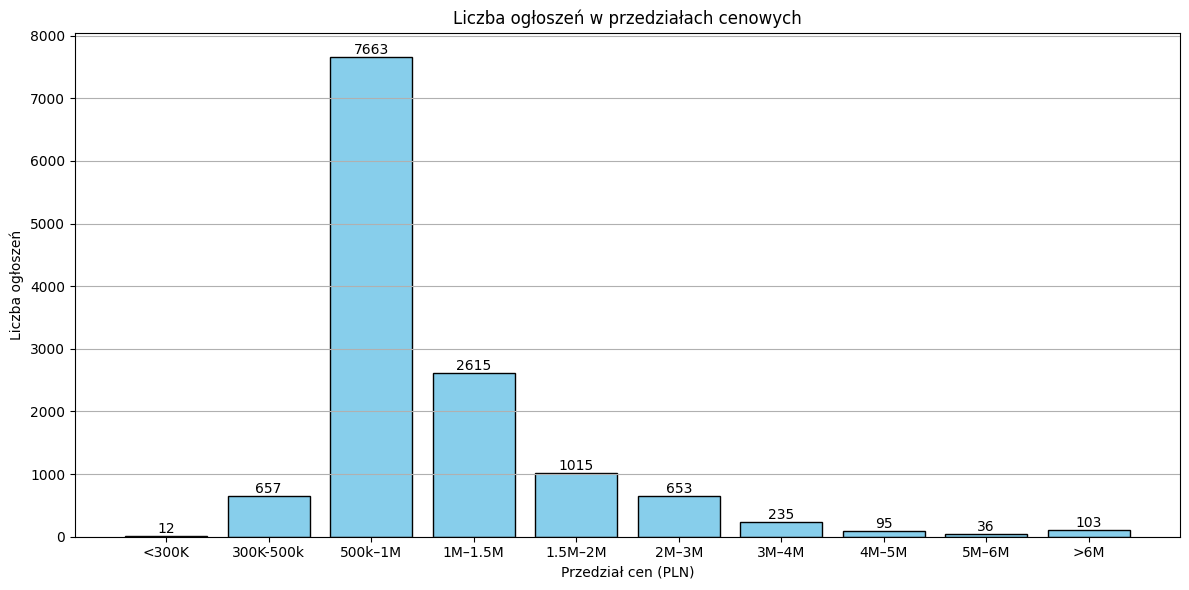

In [412]:
# Zdefiniowane przedziały
bins = [0,300_000, 500_000, 1_000_000, 1_500_000, 2_000_000, 3_000_000, 4_000_000, 5_000_000, 6_000_000, np.inf]
labels = ['<300K','300K-500k', '500k–1M', '1M–1.5M', '1.5M–2M', '2M–3M', '3M–4M', '4M–5M', '5M–6M', '>6M']

# Przypisanie przedziału
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Zliczanie ogłoszeń
counts = df['price_range'].value_counts().sort_index()

# Wykres słupkowy
plt.figure(figsize=(12, 6))
bars = plt.bar(counts.index.astype(str), counts.values, color='skyblue', edgecolor='black')

# Dodanie etykiet nad słupkami
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(int(height)), ha='center', va='bottom')

plt.title('Liczba ogłoszeń w przedziałach cenowych')
plt.xlabel('Przedział cen (PLN)')
plt.ylabel('Liczba ogłoszeń')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [413]:
lower = df['price'].quantile(0.03)
upper = df['price'].quantile(0.93)

df = df[(df['price'] >= lower) & (df['price'] <= upper)]

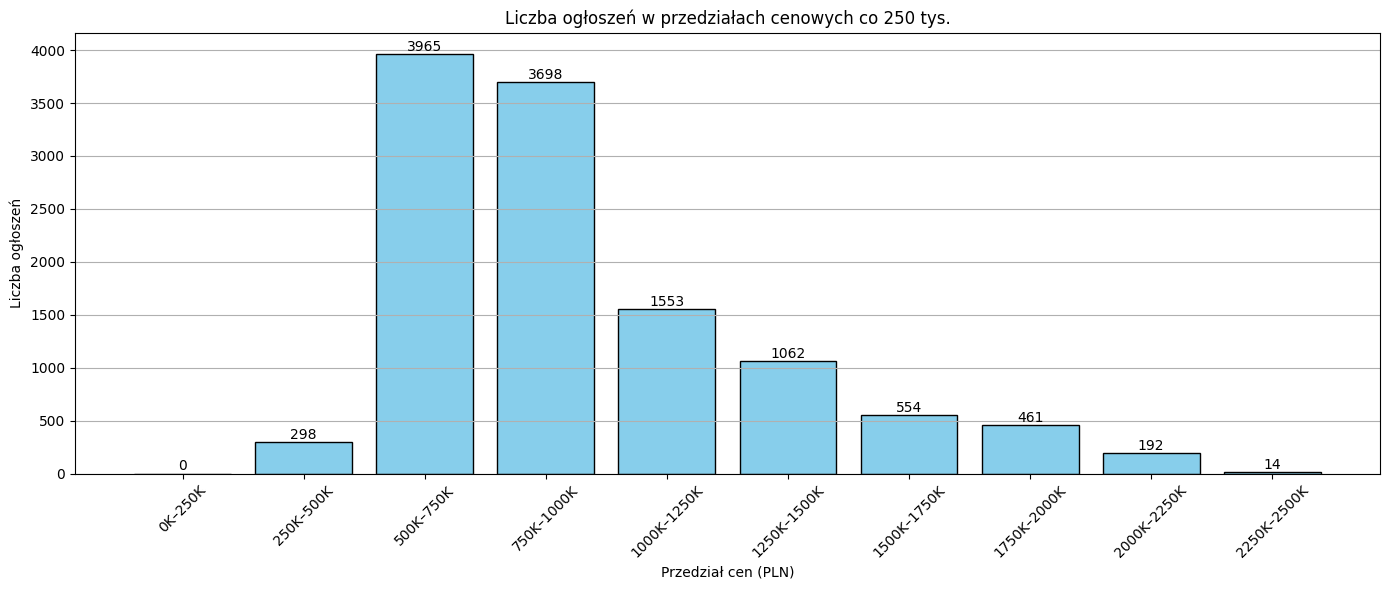

In [414]:
# Automatyczne przedziały co 250 tys. do 5 mln
bins = np.arange(0, 2_750_000, 250_000)  # np. [0, 250000, 500000, ..., 5000000]
labels = [f"{int(bins[i]/1000)}K–{int(bins[i+1]/1000)}K" for i in range(len(bins)-1)]

# Przypisanie przedziałów
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Zliczanie ogłoszeń
counts = df['price_range'].value_counts().sort_index()

# Wykres słupkowy
plt.figure(figsize=(14, 6))
bars = plt.bar(counts.index.astype(str), counts.values, color='skyblue', edgecolor='black')

# Etykiety nad słupkami
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, str(int(height)), ha='center', va='bottom')

plt.title('Liczba ogłoszeń w przedziałach cenowych co 250 tys.')
plt.xlabel('Przedział cen (PLN)')
plt.ylabel('Liczba ogłoszeń')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [415]:
# Grupowanie po district i liczenie średnich
grouped_df = df.groupby('district')[['row_price_m2', 'total_area', 'no_rooms']].mean().reset_index()
# Liczenie liczby ogłoszeń (wierszy) dla każdego district
counts = df['district'].value_counts().reset_index()
counts.columns = ['district', 'Property adverts']

# Dołączanie liczby ogłoszeń do grouped_df
grouped_df = grouped_df.merge(counts, on='district')

# Zliczanie liczby wystąpień każdej kategorii price_range dla każdego district
price_range_counts = pd.crosstab(df['district'], df['price_range']).reset_index()

# Dołączanie zliczeń price_range do grouped_df
grouped_df = grouped_df.merge(price_range_counts, on='district', how='left')

In [416]:
grouped_df.sort_values(by='row_price_m2', ascending=False, inplace=True)


In [417]:
grouped_df.head(20)

district  row_price_m2  total_area  no_rooms  \
47              Mariensztat  27330.500000   49.745000  2.500000   
143  Śródmieście Południowe  26096.000000   51.784133  2.213333   
104            Stare Miasto  25946.514286   53.801143  2.371429   
22                   Filtry  24324.833333   62.140000  2.500000   
52                    Mirów  24070.316667   47.418167  2.150000   
63              Nowe Miasto  24046.153846   54.313077  2.384615   
76                  Powiśle  23746.590909   50.767955  2.329545   
142             Śródmieście  23332.823718   49.974087  2.214744   
74         Pole Mokotowskie  23233.166667   41.041667  1.833333   
18                   Czyste  22877.230769   55.973590  2.641026   
144    Śródmieście Północne  22285.388060   46.627761  2.194030   
45                 Latawiec  22050.000000   46.400000  2.000000   
79                  Powązki  22009.166667   55.398333  3.000000   
14                  Centrum  21891.900000   52.180667  2.366667   
68                  Odolany  21725.113208   52.789057  2.433962   
130                    Wola  21640.532110   47.538750  2.215596   
133                Wyględów  21255.095238   48.723333  2.142857   
102             Stara Praga  20629.041667   48.725833  2.166667   
147                Żoliborz  20511.788546   51.722159  2.308370   
92         Sady Żoliborskie  20371.634921   48.476032  2.285714   

     Property adverts  250K–500K  500K–750K  750K–1000K  1000K–1250K  \
47                  2          0          0           0            0   
143                75          1         11          14            8   
104                35          0          1           6            7   
22                  6          0          0           2            0   
52                 60          0         11          21           13   
63                 13          0          0           3            3   
76                 88          2          9          31           13   
142               624          6         99         203          112   
74                  6          0          4           0            0   
18                 39          0          2          14            9   
144                67          2         16          26            4   
45                  2          0          0           1            1   
79                  6          0          0           2            1   
14                 30          0          5           9            7   
68                 53          1          7          16           12   
130               872         20        225         281          126   
133                21          1          7           4            2   
102                24          0          9           6            2   
147               227          5         67          49           28   
92                 63          1         24          14            6   

     1250K–1500K  1500K–1750K  1750K–2000K  2000K–2250K  2250K–2500K  
47             2            0            0            0            0  
143           18            5           11            6            1  
104           13            3            2            2            1  
22             0            2            2            0            0  
52             2            5            7            1            0  
63             4            1            1            1            0  
76            15            5            4            9            0  
142           86           35           57           23            3  
74             1            0            0            1            0  
18             3            4            6            1            0  
144            8            4            6            1            0  
45             0            0            0            0            0  
79             1            2            0            0            0  
14             3            4            2            0            0  
68             7            5    

In [418]:
grouped_df.tail(50)

district  row_price_m2  total_area  no_rooms  \
24                Gocławek  15157.055556   59.272778  2.666667   
145                  Żerań  15149.254545   57.730182  2.636364   
1                     Anin  15141.090909   65.564545  2.363636   
34                 Jelonki  15099.760000   56.395600  2.640000   
33                 Imielin  14991.875000   56.170000  2.416667   
69                  Okęcie  14968.500000   95.979444  2.833333   
15             Chomiczówka  14946.357143   58.390952  2.904762   
129                Witolin  14880.666667   68.300000  3.000000   
98                Skorosze  14747.300000   58.230333  2.533333   
121                  Ursus  14728.606452   52.373952  2.704839   
119  Targówek Mieszkaniowy  14709.833333   57.785333  2.800000   
117               Targówek  14693.584416   54.894383  2.659091   
137                Zacisze  14622.523810   54.000000  2.380952   
139                 Zbytki  14575.500000   71.725000  3.000000   
8        Białołęka Dworska  14542.500000   56.431667  2.833333   
11                Brzeziny  14364.666667   52.538889  2.666667   
13       Bródno-Podgrodzie  14267.750000   43.875000  2.250000   
46                Lewandów  14209.400000   56.600000  3.000000   
12                  Bródno  14147.206704   49.685866  2.636872   
53             Międzylesie  14060.454545   92.891818  3.318182   
61             Nowe Bródno  13975.333333   42.466667  2.333333   
116              Tarchomin  13945.528571   58.889286  2.642857   
65               Nowodwory  13939.760000   54.816000  2.540000   
91                   Sadul  13883.000000   68.430000  3.000000   
85                 Radiowo  13843.333333   56.773333  2.333333   
7                Białołęka  13787.709343   55.200254  2.683968   
123                  Wawer  13694.580645   67.302702  3.004032   
99                 Spławie  13666.166667  105.065000  4.166667   
110               Szamocin  13469.000000   48.260000  2.000000   
28                Grodzisk  13466.958333   51.454583  2.375000   
21                Falenica  13304.090909   75.308182  3.090909   
39                Kawęczyn  13230.666667   42.066667  2.333333   
40                Kobiałka  13060.400000   57.540000  2.700000   
35        Jeziorki Polskie  12966.000000   40.800000  2.000000   
66          Nowy Rembertów  12901.777778   51.206667  2.500000   
146         Żerań Wschodni  12900.000000   48.170000  2.500000   
43         Kąty Grodziskie  12875.000000   40.000000  3.000000   
141                Zielona  12718.000000   60.000000  3.000000   
89               Rembertów  12581.774194   55.075968  2.774194   
78                Powsinek  12258.000000  155.000000  5.000000   
140                 Zerzeń  11891.500000  103.155000  4.000000   
51              Miedzeszyn  11817.000000   82.410000  4.000000   
100          Stara Miłosna  11753.072727   82.289273  3.127273   
77                  Powsin  11703.000000  142.666667  5.000000   
10                  Borków  11642.000000   67.000000  3.000000   
106        Stary Rembertów  11375.769231   81.767692  3.384615   
36                Julianów  10777.000000   56.600000  3.000000   
134                 Wygoda  10153.000000   84.375000  4.000000   
86                  Radość   9985.000000   65.000000  3.000000   
29               Groszówka   8686.000000  103.500000  5.000000   

     Property adverts  250K–500K  500K–750K  750K–1000K  1000K–1250K  \
24                 18          0          7           8            1   
145                55          0         14          31           10   
1                  11          0          4           3            1   
34                 25          1         12           6            3   
33                 24          0          8          12            4   
69                 18          1          5           6            1   
15                 42          0         21          12            4   
129                 3          0          1           0            2   
98 

In [419]:
filtered_df = grouped_df[grouped_df['Property adverts'] > 10]


In [420]:
filtered_df.sort_values(by='Property adverts', ascending=False, inplace=True)
filtered_df.head(10)


/var/folders/75/8ybrj1sn4rv_ccfth6dy97hw0000gn/T/ipykernel_2140/1934899504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(by='Property adverts', ascending=False, inplace=True)


district  row_price_m2  total_area  no_rooms  Property adverts  \
54          Mokotów  19409.375709   55.548348  2.492308              1235   
130            Wola  21640.532110   47.538750  2.215596               872   
7         Białołęka  13787.709343   55.200254  2.683968               867   
142     Śródmieście  23332.823718   49.974087  2.214744               624   
121           Ursus  14728.606452   52.373952  2.704839               620   
6            Bemowo  16304.459302  303.371202  2.687984               516   
122         Ursynów  16713.558824   64.324853  2.756303               476   
81   Praga-Południe  16565.969762   53.147451  2.457883               463   
9           Bielany  16336.186364   52.245955  2.506818               440   
128         Wilanów  19400.087719   68.467368  2.691729               399   

     250K–500K  500K–750K  750K–1000K  1000K–1250K  1250K–1500K  1500K–1750K  \
54          13        302         342          237          151           90   
130         20        225         281          126          109           55   
7           52        483         226           71           23            8   
142          6         99         203          112           86           35   
121         22        315         219           44            9            8   
6            5        159         187           76           52           25   
122          5         84         200           78           51           36   
81          11        187         152           64           27            8   
9           12        199         143           41           28            7   
128          1         21         107           70           82           46   

     1750K–2000K  2000K–2250K  2250K–2500K  
54            71           28            1  
130           43           13            0  
7              2            1            1  
142           57           23            3  
121            3            0            0  
6              7            4            1  
122           17            4            1  
81             7            7            0  
9              8            2            0  
128           53           17            2

In [421]:
filtered_df.tail(10)


district  row_price_m2  total_area  no_rooms  Property adverts  \
96         Siekierki  19910.250000   64.420000  2.875000                16   
38          Kamionek  19754.312500   54.914375  2.500000                16   
31             Górce  16014.933333   58.182000  2.533333                15   
63       Nowe Miasto  24046.153846   54.313077  2.384615                13   
106  Stary Rembertów  11375.769231   81.767692  3.384615                13   
113        Słodowiec  18709.333333   41.881667  2.166667                12   
1               Anin  15141.090909   65.564545  2.363636                11   
17        Czerniaków  16946.272727   65.707273  3.090909                11   
132         Wyczółki  20313.454545   47.670909  2.272727                11   
21          Falenica  13304.090909   75.308182  3.090909                11   

     250K–500K  500K–750K  750K–1000K  1000K–1250K  1250K–1500K  1500K–1750K  \
96           0          0           5            4            2            3   
38           1          3           4            3            3            1   
31           0          4           6            2            2            1   
63           0          0           3            3            4            1   
106          0          6           5            1            1            0   
113          0          8           2            1            1            0   
1            0          4           3            1            2            1   
17           0          2           3            3            2            0   
132          0          4           1            4            2            0   
21           0          4           2            3            2            0   

     1750K–2000K  2000K–2250K  2250K–2500K  
96             1            1            0  
38             0            1            0  
31             0            0            0  
63             1            1            0  
106            0            0            0  
113            0            0            0  
1              0            0            0  
17             1            0            0  
132            0            0            0  
21             0            0            0

In [422]:
df[df['city'] == 'zabki'].describe()

id  id_realestateagency  market_type  price  row_price_m2  total_area  \
count  0.0                  0.0          0.0    0.0           0.0         0.0   
mean   NaN                  NaN          NaN    NaN           NaN         NaN   
std    NaN                  NaN          NaN    NaN           NaN         NaN   
min    NaN                  NaN          NaN    NaN           NaN         NaN   
25%    NaN                  NaN          NaN    NaN           NaN         NaN   
50%    NaN                  NaN          NaN    NaN           NaN         NaN   
75%    NaN                  NaN          NaN    NaN           NaN         NaN   
max    NaN                  NaN          NaN    NaN           NaN         NaN   

       no_rooms  kitchen_type  building_year  elevator  balcony/loggia  \
count       0.0           0.0            0.0       0.0             0.0   
mean        NaN           NaN            NaN       NaN             NaN   
std         NaN           NaN            NaN       NaN             NaN   
min         NaN           NaN            NaN       NaN             NaN   
25%         NaN           NaN            NaN       NaN             NaN   
50%         NaN           NaN            NaN       NaN             NaN   
75%         NaN           NaN            NaN       NaN             NaN   
max         NaN           NaN            NaN       NaN             NaN   

       basement  property_rent  property_level_clean  garage  security_count  
count       0.0            0.0                   0.0     0.0             0.0  
mean        NaN            NaN                   NaN     NaN             NaN  
std         NaN            NaN                   NaN     NaN             NaN  
min         NaN            NaN                   NaN     NaN             NaN  
25%         NaN            NaN                   NaN     NaN             NaN  
50%         NaN            NaN                   NaN     NaN             NaN  
75%         NaN            NaN                   NaN     NaN             NaN  
max         NaN            NaN                   NaN     NaN             NaN

In [423]:
df.describe()

id  id_realestateagency   market_type         price  \
count  1.179700e+04         9.549000e+03  11797.000000  1.179700e+04   
mean   6.650375e+07         6.131528e+06      0.208019  9.551120e+05   
std    6.061207e+05         3.554420e+06      0.405908  3.789146e+05   
min    4.157775e+07         1.473800e+04      0.000000  4.700000e+05   
25%    6.644241e+07         2.609828e+06      0.000000  6.800000e+05   
50%    6.666913e+07         7.623895e+06      0.000000  8.490000e+05   
75%    6.676606e+07         9.109263e+06      0.000000  1.145000e+06   
max    6.682841e+07         1.084359e+07      1.000000  2.274900e+06   

       row_price_m2     total_area      no_rooms  kitchen_type  building_year  \
count  11797.000000   11797.000000  11797.000000  11797.000000   10743.000000   
mean   17759.960583      65.798031      2.521828      0.250742    1994.460207   
std     4605.484145    1159.766556      0.884267      0.433458      56.491802   
min       12.000000      18.000000      1.000000      0.000000       1.000000   
25%    14500.000000      40.000000      2.000000      0.000000    1972.000000   
50%    16926.000000      51.000000      2.000000      0.000000    2006.000000   
75%    19998.000000      64.000000      3.000000      1.000000    2022.000000   
max    46610.000000  126000.000000      9.000000      1.000000    2027.000000   

           elevator  balcony/loggia      basement  property_rent  \
count  11797.000000    11797.000000  11797.000000   1.176400e+04   
mean       0.667119        0.960329      0.381029   1.040655e+03   
std        0.471264        0.195194      0.485660   1.037409e+04   
min        0.000000        0.000000      0.000000   1.000000e+00   
25%        0.000000        1.000000      0.000000   6.030017e+02   
50%        1.000000        1.000000      0.000000   8.000000e+02   
75%        1.000000        1.000000      1.000000   1.000000e+03   
max        1.000000        1.000000      1.000000   1.099000e+06   

       property_level_clean        garage  security_count  
count          11500.000000  11797.000000    11797.000000  
mean               2.987217      0.555650        1.775112  
std                2.662856      0.496915        1.455231  
min               -1.000000      0.000000        0.000000  
25%                1.000000      0.000000        1.000000  
50%                2.000000      1.000000        2.000000  
75%                4.000000      1.000000        3.000000  
max               11.000000      1.000000        6.000000

In [428]:
#Niestety musimy wyrzucić Nan z discrict gdzie nie znamy czynusz 

df.dropna(subset=['property_rent'], inplace=True)
df.dropna(subset=['property_level_clean'], inplace=True)


In [436]:
#Sprawdzam Nan 
missing = df.isna().sum().sort_values(ascending=False)
print(missing)

security                2772
heating_type            2306
id_realestateagency     2204
building_type           1626
id                         0
kitchen_type               0
security_count             0
garage                     0
property_level_clean       0
property_rent              0
basement                   0
balcony/loggia             0
elevator                   0
building_year              0
no_rooms                   0
total_area                 0
district                   0
city                       0
row_price_m2               0
price                      0
property_type              0
market_type                0
portal_name                0
url                        0
date_update                0
date_added                 0
price_range                0
dtype: int64


In [439]:
df['building_type'].value_counts(dropna=False)


building_type
block        5994
apartment    2622
NaN          1626
tenement     1113
ribbon         64
house          38
infill          8
loft            2
Name: count, dtype: int64

In [442]:
df[df['building_type'].isna()]

id  id_realestateagency                 date_added  \
5      66497697           10554074.0  2025-02-18 16:04:43+01:00   
6      66326732           10554074.0  2025-01-13 15:19:25+01:00   
16     66760552            1570478.0  2025-04-25 15:41:20+02:00   
24     66828350           10560482.0  2025-05-15 16:49:15+02:00   
25     66828347           10560482.0  2025-05-15 16:49:14+02:00   
...         ...                  ...                        ...   
16017  64699341            7409593.0  2023-10-10 17:05:35+02:00   
16025  64490176            3718987.0  2023-08-07 12:36:03+02:00   
16044  63456468            3718987.0  2022-09-01 18:35:31+02:00   
16045  63416718             570652.0  2022-08-19 16:50:29+02:00   
16050  62913463            2704220.0  2022-03-24 14:11:23+01:00   

                     date_update  \
5      2025-05-15 17:05:19+02:00   
6      2025-05-15 17:04:59+02:00   
16     2025-05-15 16:59:57+02:00   
24     2025-05-15 16:49:22+02:00   
25     2025-05-15 16:49:22+02:00   
...                          ...   
16017  2025-05-02 21:51:03+02:00   
16025  2025-04-28 17:54:28+02:00   
16044  2025-04-19 02:45:07+02:00   
16045  2025-05-14 17:01:19+02:00   
16050  2025-05-07 23:37:25+02:00   

                                                     url portal_name  \
5             2-pokojowe-mieszkanie-40m2-ogrodek-ID4w15w      Otodom   
6           4-pokojowe-mieszkanie-80m2-2-balkony-ID4uiC0      Otodom   
16     jasne-sloneczne-taras-widok-na-rzeke-polecam-I...      Otodom   
24            okazja-nowoczesne-2-pokoje-na-woli-ID4vp6C      Otodom   
25     luksus-w-sercu-warszawy-apartament-w-chmielna-...      Otodom   
...                                                  ...         ...   
16017  mieszkanie-114m2-5-pok-poddasze-46m2-bialoleka...      Otodom   
16025         do-sprzedania-luksusowe-mieszkanie-ID4mAQ8      Otodom   
16044           mieszkanie-przy-zlotych-tarasach-ID4ifWq      Otodom   
16045                        ursynow-dla-rodziny-ID4i5Ai      Otodom   
16050                   mieszkanie-75-m-warszawa-ID4fYFh      Otodom   

       market_type property_type      price  row_price_m2  ... heating_type  \
5                1    mieszkanie   543413.0       13565.0  ...          NaN   
6                1    mieszkanie   888989.0       11108.0  ...          NaN   
16               0    mieszkanie   629000.0       11981.0  ...        urban   
24               1    mieszkanie   995775.0       18291.0  ...          NaN   
25               1    mieszkanie  1266000.0       32156.0  ...          NaN   
...            ...           ...        ...           ...  ...          ...   
16017            1    mieszkanie  1400000.0       12280.0  ...          NaN   
16025            0    mieszkanie   819000.0       20946.0  ...          NaN   
16044            0    mieszkanie  1026000.0       19469.0  ...          NaN   
16045            0    mieszkanie  1953000.0       21000.0  ...        urban   
16050            0    mieszkanie  1250000.0       16667.0  ...          NaN   

      elevator  balcony/loggia  basement  \
5            1               1         0   
6            1               1         0   
16           1               1         0   
24           0               1         0   
25           1               1         0   
...        ...             ...       ...   
16017        0               1         0   
16025        0               1         0   
16044        0               0         0   
16045        1               1         1   
16050        1               1         0   

                                                security property_rent  \
5                                        ['closed_area']    995.277412   
6                                        ['closed_area']   1988.318804   
16                                             ['alarm']    350.000000   
24                                                   NaN    812.085352   
25     ['anti_burglary_door', 'entryphone', 'monitori...    65

In [433]:
#Zamień Nan na medianę w koluimnie building_year
df['building_year'].fillna(df['building_year'].median(), inplace=True)

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11467 entries, 0 to 16074
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    11467 non-null  int64   
 1   id_realestateagency   9263 non-null   float64 
 2   date_added            11467 non-null  object  
 3   date_update           11467 non-null  object  
 4   url                   11467 non-null  object  
 5   portal_name           11467 non-null  object  
 6   market_type           11467 non-null  int64   
 7   property_type         11467 non-null  object  
 8   price                 11467 non-null  float64 
 9   row_price_m2          11467 non-null  float64 
 10  city                  11467 non-null  object  
 11  district              11467 non-null  object  
 12  total_area            11467 non-null  float64 
 13  no_rooms              11467 non-null  float64 
 14  kitchen_type          11467 non-null  int64   
 15  buildin